In [33]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import sparse, stats
import seaborn as sns

In [34]:
def hp_filter(x, lamb=5000):
    w = len(x)
    b = [[1]*w, [-2]*w, [1]*w]
    D = sparse.spdiags(b, [0, 1, 2], w-2, w)
    I = sparse.eye(w)
    B = (I + lamb*(D.transpose()*D))
    return sparse.linalg.dsolve.spsolve(B, x)

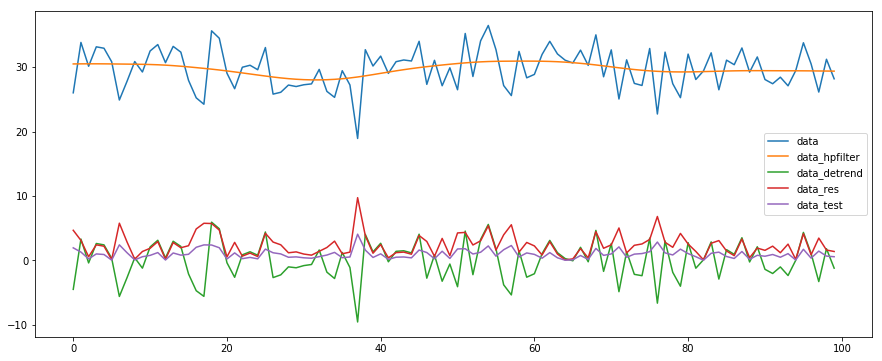

In [141]:
data_hpfilter = hp_filter(data, lamb=1000) #找平滑曲線
data_detrend = data - data_hpfilter #De-trend
data_detrend = pd.Series(data_detrend)
data_res = (data_detrend-data_detrend.median()).abs() #殘差 
data_test = (data_detrend-data_detrend.median()).abs() / (data_detrend.mad() + 1e-12) #殘差除以mad 

plt.figure(figsize=(15,6))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.plot(data_res, label='data_res')
plt.plot(data_test, label='data_test')
plt.legend()


## 產生一組數據

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(data, label='data')
plt.legend()

## 找平滑曲線

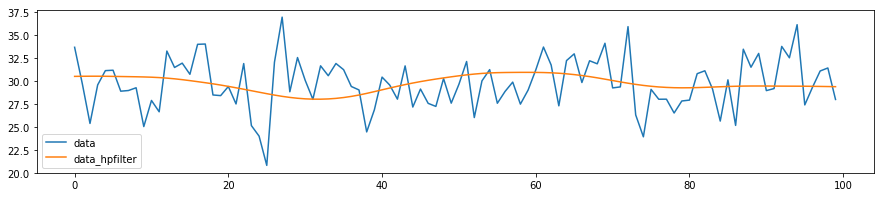

In [148]:
plt.figure(figsize=(15,3))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.legend()


## De-trend

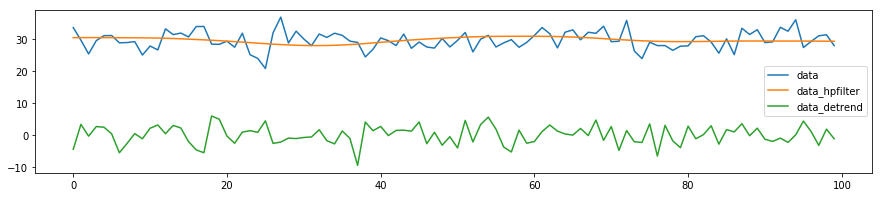

In [150]:
plt.figure(figsize=(15,3))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.legend()


## 殘差 
abs((x-x_median))


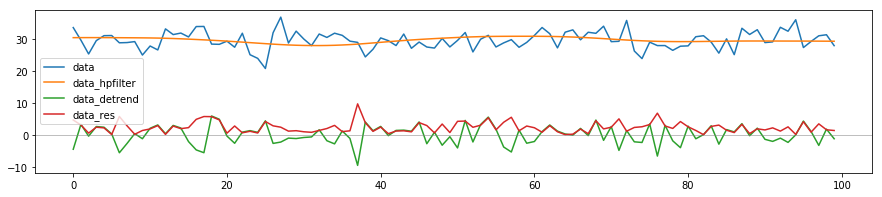

In [154]:
plt.figure(figsize=(15,3))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.plot(data_res, label='data_res')
plt.axhline(0, lw=0.5, c='gray')
plt.legend()

## 殘差/平均差距
平均差距 = mean(x-x_mean)  
殘差/平均差距 = 殘差是平均差距的幾倍？, ex: 殘差是3, 平均差距是1.5, 則殘差/平均差距=2, 把殘差絕對值轉換成相對值

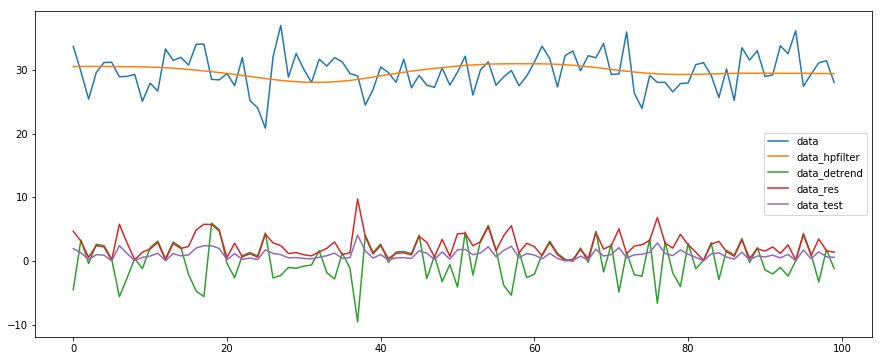

In [155]:
plt.figure(figsize=(15,6))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.plot(data_res, label='data_res')
plt.plot(data_test, label='data_test')
plt.legend()

## 殘差/平均差距 = 用來檢測是否為異常的的數據
- 如何知道是否是異常？ -> 極端值就是異常 -> 分佈在比較邊邊的就是極端值

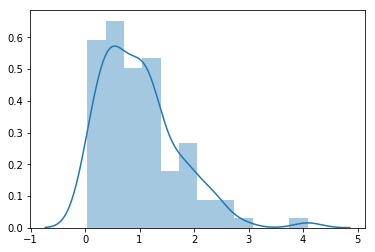

In [158]:
sns.distplot(data_test) #分佈

## 從統計的觀點計算臨界值
- 首先用手上的數據, 推估整體的數據分佈   
(ex: 一整天可能做3000多個模次, 但我們只有拿其中的50筆數據, 所以我們要用這50筆的平均值, 標準差來推估3000多個模次的資料分佈範圍)
- 假設：95%的數據是正常的 -> 找到95%的數據分佈範圍在哪裡 -> 臨界值

mean=0.9988162312833979, std=0.7191005520818154


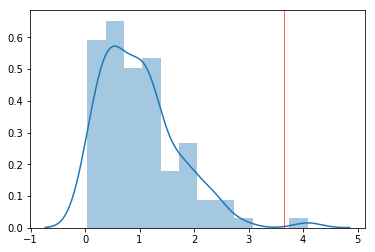

In [172]:
print(f"mean={data_test.mean()}, std={data_test.std()}")
R = stats.expon.interval(0.95, loc=data_test.mean(), scale=data_test.std())
sns.distplot(data_test) #分佈
plt.axvline(R[1], c='red',lw=0.6)